In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import time
import calendar
import urllib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import sklearn
import sklearn.ensemble as ens
from sklearn import preprocessing, metrics, cluster
from scipy import stats
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

sns.set()
colours = sns.color_palette("husl", 8)
cs = [colours[i] for i in range(len(colours))]
sns.set_palette(sns.color_palette(colours))
register_matplotlib_converters()

### Load MAPE and RMSE scores from historical and regression models.

In [9]:
%store -r historical_mapes
%store -r historical_rmses
%store -r regression_mapes
%store -r regression_rmses

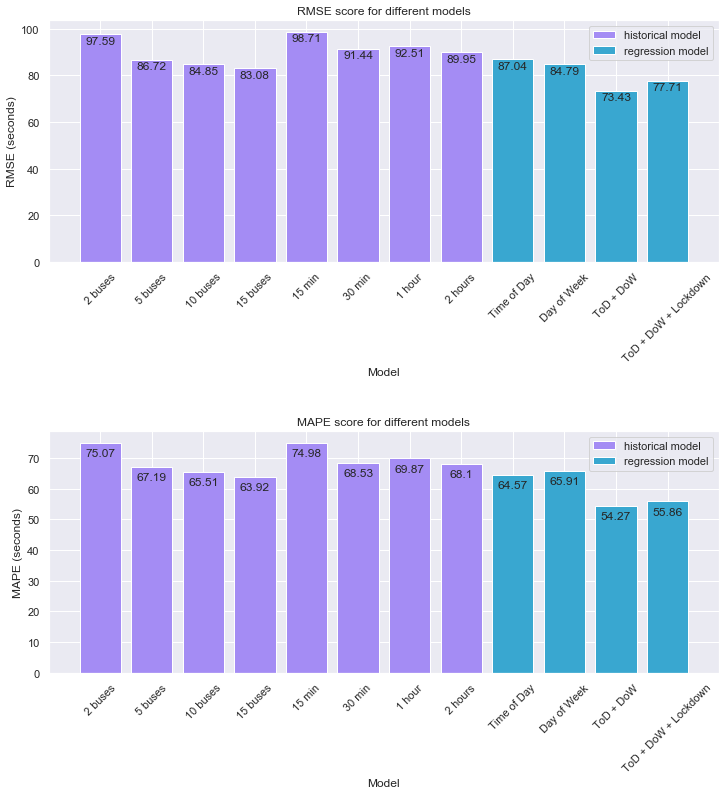

In [23]:
historical_labels = ["2 buses", "5 buses", "10 buses", "15 buses", "15 min", "30 min", "1 hour", "2 hours"]
regression_labels = ["Time of Day", "Day of Week", "ToD + DoW", "ToD + DoW + Lockdown"]
all_mapes = historical_mapes + regression_mapes
all_rmses = historical_rmses + regression_rmses

fig, ax = plt.subplots(figsize=(12,12), nrows = 2, ncols = 1)
plt.xticks(rotation=45)

# different colours for buses back bersus time back
ax[0].bar(historical_labels, historical_rmses, color=cs[6], label="historical model")
ax[0].bar(regression_labels, regression_rmses, color=cs[5], label="regression model")
ax[0].set_title("RMSE score for different models")
ax[0].set_xlabel("Model")
ax[0].set_ylabel("RMSE (seconds)")
ax[0].legend()

for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)

rects_rmse = ax[0].patches
labels_rmse = [round(i, 2) for i in all_rmses]

for rect, label in zip(rects_rmse, labels_rmse):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width() / 2, height - 5, label,
            ha='center', va='bottom')

ax[1].bar(historical_labels, historical_mapes, color=cs[6], label="historical model")
ax[1].bar(regression_labels, regression_mapes, color=cs[5], label="regression model")
ax[1].set_title("MAPE score for different models")
ax[1].set_xlabel("Model")
ax[1].set_ylabel("MAPE (seconds)")
ax[1].legend()

rects_mape = ax[1].patches
labels_mape = [round(i, 2) for i in all_mapes]

for rect, label in zip(rects_mape, labels_mape):
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2, height - 5, label,
            ha='center', va='bottom')

plt.subplots_adjust(hspace=0.7)
plt.show()